# 1. Starting the research question

### 1.1 Import Data and Packages

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("boder_english_questions.csv") # see Boder_q_a in the data link below

Data: https://docs.google.com/spreadsheets/d/1yie_kXDaWOnuLV6UOi65qWAAgtWjvBbSilumxMKtRDU/edit#gid=0

In [3]:
df.head()

,id_new,sent_num,words
0,1,5,Let me tell you frankly [?]: Do not tell me so...
1,1,7,. . . until today. But to you personally. Wher...
2,1,9,How old were you then? What grade were you in ...
3,1,11,"What means ""first grade""? The highest grade?"
4,1,13,". . . of the ""Volks-""?"


### 1.2 Plan

1. Review the literature and source
2. Clean data
3. Use traditional ways of categorizing questions
4. Use algorithms in others' publications to categorize questions
5. Compare the above two methods and find out a suitable way for our research purpose
    - need to be interpretable
    - need to be precise
    - need to be able to deal with translated materials

### 1.3 Literature/Source Review

- Github Topic of "question classifier": (original: https://github.com/topics/question-classifier)
    
    - Question-Classification as what, when, who, affirmation, unknown https://github.com/swapkh91/Question-Classification (this one is useful for our topic, but is built in Python 2.7 and need conversion)
    - Question Type Classification https://github.com/ankushbhatia2/QuestionTypeClassification (related to the one above)
    - Question Classifier https://github.com/shilpavijay/Question-Classifier (related to the one above)
    - question-classifier https://github.com/rahulgurnani/question-classification (related to the one above, may have some new categories)
    
    The Above four repos briefly represent what others have done in this field. Also:
    
    - Recurrent Convolutional Neural Networks for Chinese Question Classification on BQuLD https://github.com/tim5go/cnn-question-classification-keras (maybe useful in further analysis in Shoah Foundation Questions)


- Post: NLP: Question Classification using Support Vector Machines https://shirishkadam.com/2017/07/03/nlp-question-classification-using-support-vector-machines-spacyscikit-learnpandas/
    
    Feature extractions:
    - WH-word: The WH-word in a question holds a lot of information about the intent of the question and what basically it is trying to seek. (What, When, How, Where and so on)
    - WH-word POS: The part of speech of the WH-word (wh-determiner, wh-pronoun, wh-adverb)
    - POS of the word next to WH-word: The part of speech of the word adjacent to WH-word or the word at 1st position in the bigram (0th being the WH-word).
    - Root POS: The part of speech of the word at the root of the dependency parse tree.
    
  Also, we can get some general idea of this field from this post.
    
    
- Related publications:
    
    - https://www.aclweb.org/anthology/D08-1097
    - https://shirishkadam.files.wordpress.com/2017/07/a-cognitive-approach-in-question-answering-system.pdf

# 2. Traditional way of human inputted rules

### 2.1 Data Cleaning and Wrangling

In [4]:
# change all the "?" inside of "[]" to "(q)"
# => change all the "?]" to "(q)]"
df.words = df.words.apply(lambda x: x.replace("?]", "(q)]"))

In [9]:
# add word count first
# exclude all the notes, i.e. inside []
df["count"]=df.words.apply(lambda x: x.count(" ")-x.count("[")+1)

In [16]:
df[df["count"]==0]

,id_new,sent_num,words,count
7000,64,407,[Apart(q)]?,0
7019,64,503,[Who(q)]?,0
13057,118,121,[unintelligible]?,0
13068,118,149,[unintelligible]?,0
13071,118,165,[unintelligible]?,0
13083,118,198,[unintelligible]?,0
13265,18,380,[unintelligible]?,0


These doesn't seems like meaningful questions. If we can confirm, then we can delete them.

### 2.2 Short questions - usually used to confirm or let interviewee to go on

In [14]:
import seaborn as sns

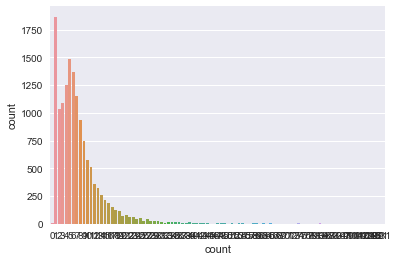

In [15]:
sns.set(style="darkgrid")
ax = sns.countplot(x="count", data=df)

In [17]:
df["count"].mean()

7.686763591263006

In [19]:
df["count"].median()

6.0

In [18]:
df["count"].max()

331

From the graph, we can see that:
- the x-axis is the word count of each question and the y-axis is the number of that specific word count
- some statistical data are shown as above. This distribution is hugely right skewed, which means most of the questions are pretty short. This might because we removed Boder's words other than questions. (this part can be easily retrieved from the original data, if needed)
- on average, each sentence has 6 to 8 words, which is pretty short in general, while the longest sentence has 331 words. (however, this might happen because several sentences are put into the same line)

Most of the visualizations above would come with higher resolution and more interactivity, if we draw them in Tableau. (If needed, I can then put them into Tableau) 

Note: From 2.3 to 2.5, the summary is brief. We *CANNOT* use simple human-input rules to know the exact types of the question, but the brief summary may somehow be meaningful.

### 2.3 To acquire specific information: WH questions - What, When, How, Where, Why
These type of question has some "priority". We need to minus this in later types.

In [25]:
df["What"] = df.words.apply(lambda x: x.count("what")+x.count("What"))
df["When"] = df.words.apply(lambda x: x.count("when")+x.count("When"))
df["How"] = df.words.apply(lambda x: x.count("how")+x.count("How"))
df["Where"] = df.words.apply(lambda x: x.count("where")+x.count("Where"))
df["Why"] = df.words.apply(lambda x: x.count("why")+x.count("Why"))

In [26]:
# sum of number of WH questions
df["WH"] = df.What + df.When + df.How + df.Where

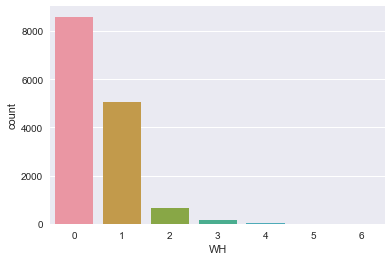

In [28]:
ax = sns.countplot(x="WH", data=df)

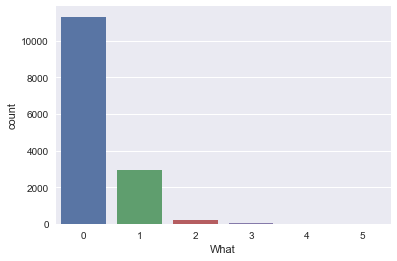

In [29]:
ax = sns.countplot(x="What", data=df)

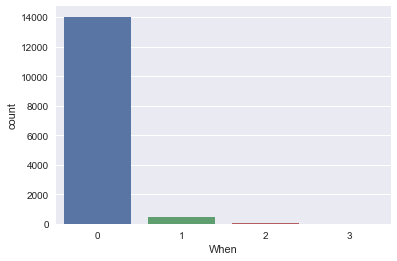

In [30]:
ax = sns.countplot(x="When", data=df)

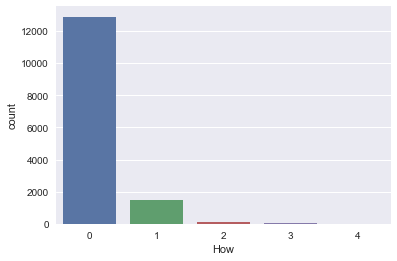

In [31]:
ax = sns.countplot(x="How", data=df)

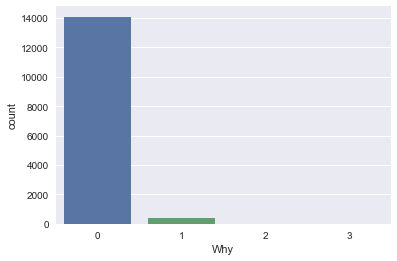

In [32]:
ax = sns.countplot(x="Why", data=df)

### 2.4 To confirm: BE questions - Is, Are, Was, Were
##### Warning: This is not specific, as we can not tell is they are BE verb or axiliary verb
For example: "Why?" is 1 for WH and 0 for BE, "How did you...?" is 1 for HW and *1* for BE (which is wrong!!!) and "Are you...?" is 0 for WH and 1 for BE. 
Solutions:
- A possible but not simple solution is using algorithms, as I suggested in part 1 and would be in part 3. 
- For now, we use the simple solution: count the Capital letter ones only! (this works)

In [33]:
df["BE"] = df.words.apply(lambda x: x.count("Is")+x.count("Are")+x.count("Was")+x.count("Were"))

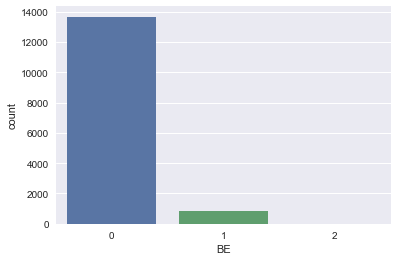

In [34]:
ax = sns.countplot(x="BE", data=df)

### 2.5 Procedure question - Can, Could, Would, May
For the same reason as 2.4, we only count capital initial ones.

In [35]:
df["Pro_q"] = df.words.apply(lambda x: x.count("Can")+x.count("Could")+x.count("Would")+x.count("May"))

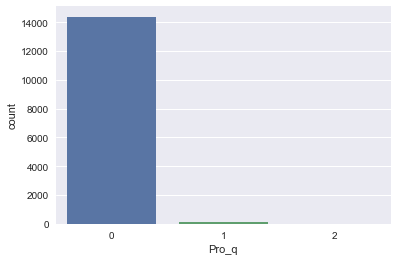

In [36]:
ax = sns.countplot(x="Pro_q", data=df)

# 3. Use algorithms  to categorize questions
TBC...

We need to decide:
- If we want to do this?
- How precise do we need?
- How can we interpret?

# 4. Compare and Conclude
TBC...